# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [13]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
import random
from tqdm.auto import tqdm
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [14]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3
MAX_STEPS = 1000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [15]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


## Helper Functions

In [16]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [17]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(841057758.4554561))

In [18]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(423495376.07525027))

# Different Tweak Functions

In [19]:
def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutations(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(new_sol, mask)
    return new_sol

#Improved RHMC
def multiple_mutations_strenght(solution, strenghts: float = 0.3):
    mask = rng.random(NUM_SETS) < strenghts
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_sol = np.logical_xor(solution, mask)
    return new_sol


## Fitness Function

In [20]:
def fitness(solution: np.ndarray) -> float:
    return (valid(solution), -cost(solution))

## Hill Climber with multiple mutations strenght

ic| fitness(best_solution): (np.True_, np.float64(-417056121.5052584))
ic| fitness(best_solution): (np.True_, np.float64(-378929971.4409082))


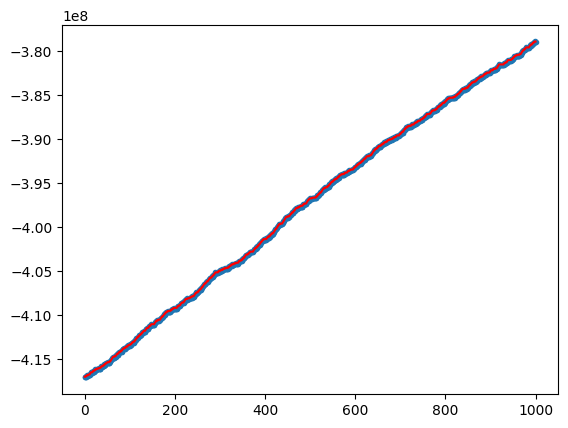

In [21]:
def hc():
    BUFFER_SIZE = 13
    solution = rng.random(NUM_SETS) < 0.5
    
    while(not valid(solution)):
        solution = multiple_mutations_strenght(solution, 0.1)

    best_solution = solution.copy()

    solution_fitness = fitness(best_solution)
    ic(fitness(best_solution))
    history = [float(solution_fitness[1])]

    tweak = multiple_mutations_strenght
    strenghts = 0.0001 
    buffer = list()

    for steps in range(MAX_STEPS):
        # SELF ADAPTED
        if steps % 1000:
            strenghts /= 2
        new_sol = tweak(best_solution, strenghts=strenghts)
        f = fitness(new_sol)
        history.append(float(f[1]))
        buffer.append(f > solution_fitness)
        buffer = buffer[-BUFFER_SIZE:]
        if sum(buffer) > BUFFER_SIZE * 1.2:
            strenghts*= 1.2
        elif sum(buffer) < BUFFER_SIZE / 2:
            strenghts /= 1.2
        
        if  f > solution_fitness:
            best_solution = new_sol 
            solution_fitness = fitness(best_solution)
            
    ic(fitness(best_solution))

    from matplotlib import pyplot as plt

    plt.figure()
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )

    plt.scatter(range(len(history)), history, marker=".")
    
hc()

## Hill Climber with single mutations 

ic| fitness(best_solution): (np.True_, np.float64(-419344426.37121296))
ic| fitness(best_solution): (np.True_, np.float64(-380222950.0457244))


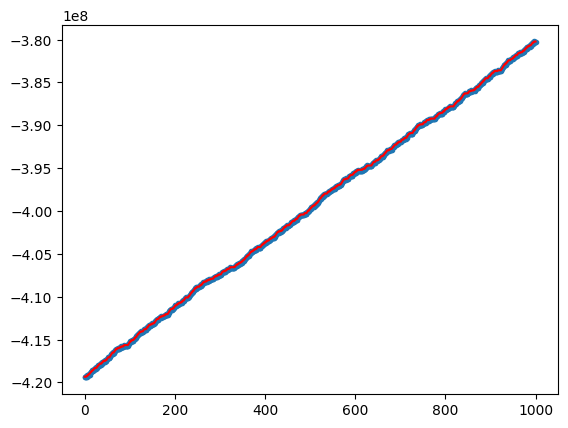

In [22]:
def hc():
    BUFFER_SIZE = 13
    solution = rng.random(NUM_SETS) < 0.5
    
    while(not valid(solution)):
        solution = single_mutation(solution)
        
    best_solution = solution.copy()
    solution_fitness = fitness(best_solution)
    ic(fitness(best_solution))
    history = [float(solution_fitness[1])]

    tweak = single_mutation
    buffer = list()
    for steps in range(MAX_STEPS):
        new_sol = tweak(best_solution)
        f = fitness(new_sol)
        history.append(float(f[1]))
        buffer.append(f > solution_fitness)
        buffer = buffer[-BUFFER_SIZE:]
        
        if  f > solution_fitness:
            best_solution = new_sol 
            solution_fitness = fitness(best_solution)
        
    ic(fitness(best_solution))

    from matplotlib import pyplot as plt

    plt.figure()
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )

    plt.scatter(range(len(history)), history, marker=".")
    
hc()

## Hill Climber with multiple mutations

ic| fitness(best_solution): (np.True_, np.float64(-424399926.2370523))
ic| fitness(best_solution): (np.True_, np.float64(-383100490.6567551))


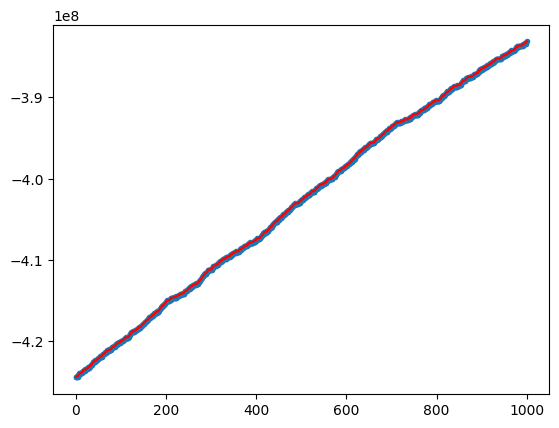

In [23]:
def hc():
    BUFFER_SIZE = 13
    solution = rng.random(NUM_SETS) < 0.5
    
    
    while(not valid(solution)):
        solution = multiple_mutations(solution)
        
    best_solution = solution.copy()
    solution_fitness = fitness(best_solution)
    ic(fitness(best_solution))
    history = [float(solution_fitness[1])]

    tweak = single_mutation
    buffer = list()
    for steps in range(MAX_STEPS):
        new_sol = tweak(best_solution)
        f = fitness(new_sol)
        history.append(float(f[1]))
        buffer.append(f > solution_fitness)
        buffer = buffer[-BUFFER_SIZE:]
        
        if  f > solution_fitness:
            best_solution = new_sol 
            solution_fitness = fitness(best_solution)
            
    ic(fitness(best_solution))

    from matplotlib import pyplot as plt

    plt.figure()
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )

    plt.scatter(range(len(history)), history, marker=".")
    
hc()

## Simulated Annealing with multiple mutations

ic| fitness(best_solution): (np.True_, np.float64(-418750475.65497196))


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(best_solution): (np.True_, np.float64(-355757576.7728069))


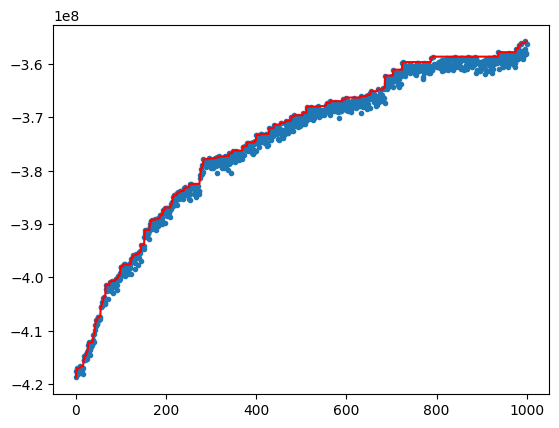

In [24]:
def simulated_annealing():
    solution = rng.random(NUM_SETS) < 0.5
    
    while(not valid(solution)):
        solution = multiple_mutations(solution)
        
    current_solution = solution.copy()
    best_solution = solution.copy()

    fitness_solution = fitness(best_solution)
    history = [fitness_solution[1]]       
    temperature = 1000
    tweak = multiple_mutations
    ic(fitness(best_solution))

    for step in tqdm(range(MAX_STEPS)):

        new_solution = tweak(current_solution)
        f = fitness(new_solution)
        history.append(f[1]) 

        if valid(new_solution):
            new_cost = -f[1]
            cost_diff = new_cost - (-fitness_solution[1])

            if cost_diff < 0 or np.random.random() < np.exp(-cost_diff / temperature):
                current_solution = new_solution.copy()

            if f[1] > fitness_solution[1]:
                best_solution = new_solution.copy()
                fitness_solution = f

        if temperature > 1e-17:
            temperature *= 0.985

    ic(fitness(best_solution))

    from matplotlib import pyplot as plt

    plt.figure()
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )

    plt.scatter(range(len(history)), history, marker=".")
    
simulated_annealing()